In [1]:
!pip install praw
import praw

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 4.7 MB/s eta 0:00:00


In [2]:
# Log In to App:
from google.colab import userdata

client_id = userdata.get('CLIENT_ID')
client_secret = userdata.get('CLIENT_SECRET')

reddit = praw.Reddit(
    client_id=client_id,
    client_secret=client_secret,
    user_agent='Scraper'
)

### Scraping comments from [r/datascience](https://www.reddit.com/r/datascience/) 2023 EOTY Official Salary Sharing Thread:

In [3]:
url = 'https://www.reddit.com/r/datascience/comments/18tevwk/official_2023_end_of_year_salary_sharing_thread/'
submission = reddit.submission(url=url)

In [4]:
from praw.models import MoreComments

comments = []

submission.comments.replace_more(limit=0)
for top_level_comment in submission.comments:
    print(top_level_comment.body)
    comments.append(top_level_comment.body)

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



[deleted]
Title: Senior Data Scientist 

Tenure length: 1 year

Location: Canada (Remote)

Salary: 175k

Company/Industry: Small Fintech Company

Education: BS Economics & Mathematics 

Prior Experience: 5 years DS, 8 years Quant Risk/Consulting/Banking

Other Bonuses: Equity

Total Comp: 175k
These salary ranges and TC packages are all over the board.
* **Title:** Sr. Staff Research Scientist
* **Tenure length:** 3.5 years
* **Location:** fully remote, based in NYC
* **Salary:** $265k. I also teach two classes a year in the city for another $27k. 
* **Company/Industry:** Public company with an R&D focus.
* **Education:** M.S. in Statistics, Ph.D in Economics
* **Prior Experience:** 1 year postdoc, 1.5 years assistant professor at a business school, some tech internships back in grad school 
* **Relocation/Signing Bonus:** $20k relocation
* **Stock and/or recurring bonuses:** $610k/year RSUs (at respective grant prices), $40k performance bonus, $45k scheduled bonus
* **Total comp:** $9

In [5]:
len(comments)

144

In [7]:
type(comments)

list

In [8]:
comments[1]

'Title: Senior Data Scientist \n\nTenure length: 1 year\n\nLocation: Canada (Remote)\n\nSalary: 175k\n\nCompany/Industry: Small Fintech Company\n\nEducation: BS Economics & Mathematics \n\nPrior Experience: 5 years DS, 8 years Quant Risk/Consulting/Banking\n\nOther Bonuses: Equity\n\nTotal Comp: 175k'

### Random Comment for Test:

In [9]:
import random

def testComment(dsName):
  global myComment
  myComment = random.choice(dsName)
  print(myComment)

In [10]:
testComment(comments)

**Title:** Senior Data Scientist - Marketing Measurement/Causal Inference

* **Tenure Length:** 1.5 years

* **Location:** NYC

    * **Remote:** Yes, working from a US MCOL Midwest city

* **Salary:** $155K

* **Company/Industry:** In-house, Tech, e-commerce

* **Education:** MS Econ, BS Finance+Psych

* **Prior Experience:** 4 years DS in marketing analytics, 5 years webdev/QA

* **Signing Bonus:** $300K RSUs

* **Stock:** Depends, anywhere between $150K to $50K in RSUs depending on the year the company had.

* **Bonus:** 10%

* **Other:** 100% company paid healthcare for myself and entire family, lifestyle spending stipend, remote work stipend, 401K match, all valued around $40K

* **Total Comp:** Somewhere between $250K and $350K


In [11]:
print(myComment) # Global so same as above

**Title:** Senior Data Scientist - Marketing Measurement/Causal Inference

* **Tenure Length:** 1.5 years

* **Location:** NYC

    * **Remote:** Yes, working from a US MCOL Midwest city

* **Salary:** $155K

* **Company/Industry:** In-house, Tech, e-commerce

* **Education:** MS Econ, BS Finance+Psych

* **Prior Experience:** 4 years DS in marketing analytics, 5 years webdev/QA

* **Signing Bonus:** $300K RSUs

* **Stock:** Depends, anywhere between $150K to $50K in RSUs depending on the year the company had.

* **Bonus:** 10%

* **Other:** 100% company paid healthcare for myself and entire family, lifestyle spending stipend, remote work stipend, 401K match, all valued around $40K

* **Total Comp:** Somewhere between $250K and $350K


### Removing useless comments (Bad Data):

We can do this iteratively by searching for comments who only followed the given template.

In [12]:
print(comments[4], '\n', comments[2])

[deleted] 
 These salary ranges and TC packages are all over the board.


In [13]:
import re
re.search('Title', myComment) # Exists

<re.Match object; span=(2, 7), match='Title'>

In [14]:
print(re.search('Another useless example', myComment)) # Does not exist

None


In [15]:
cleaned = []

for i in comments:
    if re.search('Title', i, re.IGNORECASE):
        cleaned.append(i)
    else:
        print("Deleted:", i)

Deleted: [deleted]
Deleted: These salary ranges and TC packages are all over the board.
Deleted: [deleted]
Deleted: Data scientist
  
1/2 year of tenure
  
190k salary
  
Remote, US
  
Small tech company
  
Masters in data science
  
2 years of prior experience as a data scientist.
  
No signing bonus
  
No other bonus to date
  
Total comp 190k
Deleted: [deleted]
Deleted: Gonna add some "non - US" data:

Tenure length: 2 years

Location: India

Salary: $19,000

Industry: a US based financial services company.

Education: bachelors in CS

Prior exp: 4 months research exp at a top lab, 6 months internship at a top consulting company, 4 months full time at the same consulting company. Then 2 years as a data scientist in my current company. 

Bonus: $500

Stock: nope

Total comp: $19,500


Now I see what my colleagues mean by cost cutting. All of this is pre taxes btw.
Deleted: [deleted]
Deleted: MLE (2)

2.5 yrs

Remote USA

~150k

HR Tech

BS Math

5 year military (grunt, not math)
- 2x

In [16]:
len(cleaned)

109

In [17]:
for i in cleaned:
    print(i)

Title: Senior Data Scientist 

Tenure length: 1 year

Location: Canada (Remote)

Salary: 175k

Company/Industry: Small Fintech Company

Education: BS Economics & Mathematics 

Prior Experience: 5 years DS, 8 years Quant Risk/Consulting/Banking

Other Bonuses: Equity

Total Comp: 175k
* **Title:** Sr. Staff Research Scientist
* **Tenure length:** 3.5 years
* **Location:** fully remote, based in NYC
* **Salary:** $265k. I also teach two classes a year in the city for another $27k. 
* **Company/Industry:** Public company with an R&D focus.
* **Education:** M.S. in Statistics, Ph.D in Economics
* **Prior Experience:** 1 year postdoc, 1.5 years assistant professor at a business school, some tech internships back in grad school 
* **Relocation/Signing Bonus:** $20k relocation
* **Stock and/or recurring bonuses:** $610k/year RSUs (at respective grant prices), $40k performance bonus, $45k scheduled bonus
* **Total comp:** $987k
Not sure if you want statisticians in here, but i can delete if yo

In [18]:
testComment(cleaned)

 
Title: Senior Data Analyst

Tenure length: 5 years 

Location: SF Bay Area 

Remote: Hybrid (very flexible)

Salary: $120k USD 

Company/Industry: Finance/Insurance 

Education: BS & Masters from top tier public school in Natural Resources 

Prior Experience: 6 years in natural resources/research/policy work 

Relocation/Signing Bonus: $5k

Stock and/or recurring bonuses: 10%

Total comp: $132k USD


#### Remove the Markdown formatting ie: *

In [19]:
# Have to escape the '*' since it is a defined Regex Symbol

myComment = re.sub('\*','',myComment)
print(myComment)

 
Title: Senior Data Analyst

Tenure length: 5 years 

Location: SF Bay Area 

Remote: Hybrid (very flexible)

Salary: $120k USD 

Company/Industry: Finance/Insurance 

Education: BS & Masters from top tier public school in Natural Resources 

Prior Experience: 6 years in natural resources/research/policy work 

Relocation/Signing Bonus: $5k

Stock and/or recurring bonuses: 10%

Total comp: $132k USD


#### Remove the other special characters:

In [20]:
# Get Rid of '*', '~', '$', '%', '•', '-'
# * and $ are Metacharacters so need to be escaped using '\'
cleaned2 = []

for i in cleaned:
    cleaned2.append(re.sub(r'[\*\$~%<>\-€•|]', '', i))

In [21]:
for i in cleaned2:
  print(i)

Title: Senior Data Scientist 

Tenure length: 1 year

Location: Canada (Remote)

Salary: 175k

Company/Industry: Small Fintech Company

Education: BS Economics & Mathematics 

Prior Experience: 5 years DS, 8 years Quant Risk/Consulting/Banking

Other Bonuses: Equity

Total Comp: 175k
 Title: Sr. Staff Research Scientist
 Tenure length: 3.5 years
 Location: fully remote, based in NYC
 Salary: 265k. I also teach two classes a year in the city for another 27k. 
 Company/Industry: Public company with an R&D focus.
 Education: M.S. in Statistics, Ph.D in Economics
 Prior Experience: 1 year postdoc, 1.5 years assistant professor at a business school, some tech internships back in grad school 
 Relocation/Signing Bonus: 20k relocation
 Stock and/or recurring bonuses: 610k/year RSUs (at respective grant prices), 40k performance bonus, 45k scheduled bonus
 Total comp: 987k
Not sure if you want statisticians in here, but i can delete if you don't.

Title: Senior Scientist: Statistics

 Tenure le

In [22]:
len(cleaned2)

109

In [23]:
testComment(cleaned2)

Title: Data Scientist 1

Tenure: 6 months

Location: Remote (Texas)

Salary: 130k

Industry: Freight Tech

Education: BS Math, currently completing MS in CS parttime

Prior Experience: 1 YOE Junior DS at F500 + 3 DS summer internships 

Relocation/Signon: None

Stock/Bonus: 15K in RSUs

TC: 145k


#### Get rid of tabs and unicode formatting:

In [24]:
import os
myComment = os.linesep.join([s for s in myComment.splitlines() if s])
print(myComment)

Title: Data Scientist 1
Tenure: 6 months
Location: Remote (Texas)
Salary: 130k
Industry: Freight Tech
Education: BS Math, currently completing MS in CS parttime
Prior Experience: 1 YOE Junior DS at F500 + 3 DS summer internships 
Relocation/Signon: None
Stock/Bonus: 15K in RSUs
TC: 145k


In [25]:
import os
tmp = []
for i in myComment.split('\n'):
  i = i.lstrip()
  i = os.linesep.join([s for s in i.splitlines() if s])
  tmp.append(i)

tmp

['Title: Data Scientist 1',
 'Tenure: 6 months',
 'Location: Remote (Texas)',
 'Salary: 130k',
 'Industry: Freight Tech',
 'Education: BS Math, currently completing MS in CS parttime',
 'Prior Experience: 1 YOE Junior DS at F500 + 3 DS summer internships ',
 'Relocation/Signon: None',
 'Stock/Bonus: 15K in RSUs',
 'TC: 145k']

In [26]:
import os

cleaned3 = []
for j in cleaned2:
    tmp = []
    for i in j.split('\n'):
        i = i.lstrip()
        i = os.linesep.join([s for s in i.splitlines() if s])

        # Check if the line is empty or whitespace
        if re.match(r'^\s*$', i):
            continue  # Skip empty lines

        # Check if the line contains a colon followed by a word
        if ':' in i and re.search(r':\s*\S', i):
            # Get rid of tabbed space and unicode junk
            tmp.append(re.sub(r'\t|\u2060', '', i))

    cleaned3.append(tmp)

In [27]:
cleaned3

[['Title: Senior Data Scientist ',
  'Tenure length: 1 year',
  'Location: Canada (Remote)',
  'Salary: 175k',
  'Company/Industry: Small Fintech Company',
  'Education: BS Economics & Mathematics ',
  'Prior Experience: 5 years DS, 8 years Quant Risk/Consulting/Banking',
  'Other Bonuses: Equity',
  'Total Comp: 175k'],
 ['Title: Sr. Staff Research Scientist',
  'Tenure length: 3.5 years',
  'Location: fully remote, based in NYC',
  'Salary: 265k. I also teach two classes a year in the city for another 27k. ',
  'Company/Industry: Public company with an R&D focus.',
  'Education: M.S. in Statistics, Ph.D in Economics',
  'Prior Experience: 1 year postdoc, 1.5 years assistant professor at a business school, some tech internships back in grad school ',
  'Relocation/Signing Bonus: 20k relocation',
  'Stock and/or recurring bonuses: 610k/year RSUs (at respective grant prices), 40k performance bonus, 45k scheduled bonus',
  'Total comp: 987k'],
 ['Title: Senior Scientist: Statistics',
  '

In [28]:
len(cleaned3)

109

In [29]:
testComment(cleaned3)

['Title: AI Engineer', 'Tenure length: 1st year\xa0', 'Location: digital nomad / SoCal', 'Remote: yes', 'Salary: 10,000 net income', 'Company/Industry: Selfemployed', 'Education: 2x masters degrees', 'Prior Experience: Banking, Data Analyst, Data Scientist, Politics', 'Relocation/Signing Bonus: won a 10k relocation grant if I move to Tulsa, Oklahoma. won and declined a 5k relocation grant if I move to Indiana', 'Stock and/or recurring bonuses: n/a', 'Total comp: Hoping for 100k400k net in 2024']


In [30]:
myComment

['Title: AI Engineer',
 'Tenure length: 1st year\xa0',
 'Location: digital nomad / SoCal',
 'Remote: yes',
 'Salary: 10,000 net income',
 'Company/Industry: Selfemployed',
 'Education: 2x masters degrees',
 'Prior Experience: Banking, Data Analyst, Data Scientist, Politics',
 'Relocation/Signing Bonus: won a 10k relocation grant if I move to Tulsa, Oklahoma. won and declined a 5k relocation grant if I move to Indiana',
 'Stock and/or recurring bonuses: n/a',
 'Total comp: Hoping for 100k400k net in 2024']

**- Make Lowercase**

**- Remove Commas**

**- Remove k and K, ie, 97k = 97000**

**- Remove trailing white space**

In [31]:
cleaned4 = []
for eachComment in cleaned3:
  comment = []
  for i in eachComment:
      if re.match('Title', i):
        i = i.lower()
        comment.append(i.rstrip())
      elif re.match('[S-s]alary', i):
        i = i.lower()
        # Remove commas
        i = i.replace(',', '')
        i = i.replace('.', '')
        # Replace [K-k] with 000
        i = i.replace('K', '000')
        i = i.replace('k', '000')
        comment.append(i.rstrip())
      elif re.match('[L-l]ocation', i):
        i = i.lower()
        comment.append(i.rstrip())
      elif re.match('[T-t]enure [L-l]ength', i):
        i = i.lower()
        comment.append(i.rstrip())
  cleaned4.append(comment)

len(cleaned4)

109

In [32]:
cleaned4

[['title: senior data scientist',
  'tenure length: 1 year',
  'location: canada (remote)',
  'salary: 175000'],
 ['title: sr. staff research scientist',
  'tenure length: 3.5 years',
  'location: fully remote, based in nyc',
  'salary: 265000 i also teach two classes a year in the city for another 27000'],
 ['title: senior scientist: statistics',
  'tenure length: 2 years',
  'location: ne usa',
  'salary: 135000 base'],
 ['title: senior staff ml engineer',
  'tenure length: 3 years',
  'location: sf bay area',
  'salary: 300000'],
 ['title: staff data scientist / tech lead manager',
  'tenure length: 3 months',
  'location: seattle/hybrid',
  'salary: 214000'],
 ['title: economist',
  'tenure length: 3.5 years',
  'location: seattle',
  'salary:165000'],
 ['title: data scientist',
  'tenure length: 2 years',
  'location: chicago, il (remote)',
  'salary: 87000'],
 ['title: data scientist',
  'tenure length: 1.5 years',
  'location: ireland',
  'salary: 65500'],
 ['title: data analyst

**Delete observations with missing elements:**

In [33]:
cleaned5 = []

for posting in cleaned4:
    # Check if the inner list contains the word "salary"
    if any('salary' in item.lower() for item in posting) or any('tesnure length' in item.lower() for item in posting):
        # If it does, add the entire inner list to the filtered list
        cleaned5.append(posting)
    else:
        # Print the inner list that doesn't contain "salary"
        print("Deleted:", posting)

# filtered_postings now contains only the inner lists that include "salary"

Deleted: ['title: senior data scientist', 'tenure length: 2 years', 'location: usa (remote, i am based in the midwest)']
Deleted: ['title:  data scientist', 'location:  remote company, midwest hq']
Deleted: []
Deleted: ['title: senior data scientist', 'tenure length: 2.5 years', 'location: ny, us']


In [34]:
cleaned5 = []

for posting in cleaned4:
    # Create a temporary list to store the dictionary for each posting
    posting_dict = []

    for item in posting:
        # Split the item by the first colon
        parts = item.split(":", 1)

        # Check if there are exactly two parts after splitting
        if len(parts) == 2:
            # Create a dictionary from the split parts
            posting_dict.append({parts[0].strip(): parts[1].strip()})
        else:
            # If there are more than two parts, join them back and try splitting again
            # This handles cases where the value contains colons
            joined = ":".join(parts[1:])
            key, value = joined.split(":", 1)
            posting_dict.append({key.strip(): value.strip()})

    # Append the list of dictionaries for the current posting
    cleaned5.append(posting_dict)

# Convert the list of lists of dictionaries to a list of dictionaries
cleaned5 = [{k: v for d in posting for k, v in d.items()} for posting in cleaned5]
len(cleaned5)

109

In [35]:
cleaned5

[{'title': 'senior data scientist',
  'tenure length': '1 year',
  'location': 'canada (remote)',
  'salary': '175000'},
 {'title': 'sr. staff research scientist',
  'tenure length': '3.5 years',
  'location': 'fully remote, based in nyc',
  'salary': '265000 i also teach two classes a year in the city for another 27000'},
 {'title': 'senior scientist: statistics',
  'tenure length': '2 years',
  'location': 'ne usa',
  'salary': '135000 base'},
 {'title': 'senior staff ml engineer',
  'tenure length': '3 years',
  'location': 'sf bay area',
  'salary': '300000'},
 {'title': 'staff data scientist / tech lead manager',
  'tenure length': '3 months',
  'location': 'seattle/hybrid',
  'salary': '214000'},
 {'title': 'economist',
  'tenure length': '3.5 years',
  'location': 'seattle',
  'salary': '165000'},
 {'title': 'data scientist',
  'tenure length': '2 years',
  'location': 'chicago, il (remote)',
  'salary': '87000'},
 {'title': 'data scientist',
  'tenure length': '1.5 years',
  'l

In [36]:
type(cleaned5)

list

### Format Dictionary:

In [37]:
for posting in cleaned5:
    salary = posting.get('salary', '')
    if salary:
      # Remove non-numeric values from salary
      posting['salary'] = re.sub("[^0-9]", "", posting['salary'])

    # Check if 'tenure length' key exists before accessing it
    tenure_length = posting.get('tenure length', '')
    if tenure_length:
        # Remove non-numeric values from tenure length
        posting['tenure length'] = re.sub("[^0-9]", "", tenure_length)

    print(posting.get('salary', 'N/A'))
    print(posting.get('tenure length', 'N/A'))

175000
1
26500027000
35
135000
2
300000
3
214000
3
165000
35
87000
2
65500
15
65000

250000
75
63300
4515
100000

2125000144000
12
86000
1
110000
15
130000
N/A
30000
4
180000
1
28000

N/A
2
175000
35
62000575000101
N/A
158000

200000
N/A
220000
25
0
7
2140005115
2
155000
15
120000
2
300000
10
179000
6
96000
6
118000
N/A
250000
101
150000
0
112000
1
120000
2
280000
4
200000
25
210000200000160000
15
14900010
14
200000
6
185000
1
130000
4
175000
55
182000
5
175000
N/A
135000
1
193000
N/A
90000
6
125000
8
205000
8
110000
N/A
90170
2
100000
8
74000
1
95000
8
78000
N/A
N/A
N/A
230000
3
140000160000
5
200000
N/A
140000
13
10000
1
180000
1
156000
N/A
N/A
N/A
41000
25
178000
18
180000
4
1300002100016000401000
2
520007000
1
115000
15
150000
3
100000
1
120000
5
130000
N/A
17
25
103000
15
112000
25
112000
N/A
100000
N/A
110000
N/A
80000
2
N/A
25
90000
1
180000
6
145000
1
104000
412
56000
3
87000
1
215000
1
60000
13
194000
2
82000
N/A
80000
N/A
90000
05
128000
15
75000
2
135000
N/A
38000
N/A
115000

In [38]:
valid_postings = []  # List to hold valid postings
deleted_postings = []  # List to hold deleted postings

for posting in cleaned5:
    salary = posting.get('salary', '')
    tenure_length = posting.get('tenure length', '')

    # Remove non-numeric values from salary
    if salary:
        posting['salary'] = re.sub("[^0-9]", "", salary)

    # Remove non-numeric values from tenure length
    if tenure_length:
        posting['tenure length'] = re.sub("[^0-9]", "", tenure_length)

    # Convert tenure length to string
    if isinstance(tenure_length, int):
        posting['tenure length'] = str(tenure_length)
    elif tenure_length:
        posting['tenure length'] = re.sub("[^0-9]", "", tenure_length)

    # Check if salary or tenure length is empty or 'N/A'
    if posting.get('salary', '') == '' or posting.get('salary', '') == 'N/A' or \
       posting.get('tenure length', '') == '' or posting.get('tenure length', '') == 'N/A':
        deleted_postings.append(posting)  # Add to deleted postings
        print("Deleted:", posting)  # Print deleted posting
    else:
        valid_postings.append(posting)  # Add to valid postings

Deleted: {'title': 'data analyst', 'tenure length': '', 'location': 'washington dc hybrid', 'salary': '65000'}
Deleted: {'title': 'bi analyst', 'tenure length': '', 'location': 'rockies (remote), us', 'salary': '100000'}
Deleted: {'title': 'data scientist 1', 'location': 'remote (texas)', 'salary': '130000'}
Deleted: {'title': 'junior data scientist', 'tenure length': '', 'location': 'hungary', 'salary': '28000'}
Deleted: {'title': 'senior data scientist', 'tenure length': '2', 'location': 'usa (remote, i am based in the midwest)'}
Deleted: {'title': 'bi analyst', 'location': 'based in midwest at corporate location but company has locations in many states. am remote though company is going hybrid. i might stay remote due to my offer letter wording.', 'salary': '62000575000101'}
Deleted: {'title': 'data scientist (l3)', 'tenure length': '', 'location': 'nyc (2/3 days in office)', 'salary': '158000'}
Deleted: {'title': 'senior data scientist  research (at my company, they have two ds lad

In [39]:
len(valid_postings)

81

In [40]:
for i in valid_postings:
  if len(i['salary']) > 6:
    print("Deleted: ", i)
    del i['salary']
  else:
    i['salary'] = int(i['salary'])

Deleted:  {'title': 'sr. staff research scientist', 'tenure length': '35', 'location': 'fully remote, based in nyc', 'salary': '26500027000'}
Deleted:  {'title': 'data scientist', 'tenure length': '12', 'location': 'ca', 'salary': '2125000144000'}
Deleted:  {'title': 'executive manager', 'tenure length': '2', 'location': 'melbourne', 'salary': '2140005115'}
Deleted:  {'title': 'developer', 'tenure length': '15', 'location': 'usa (think sf/seattle/nyc)', 'salary': '210000200000160000'}
Deleted:  {'title': 'analytics manager', 'tenure length': '14', 'location': 'hybrid inoffice 3 days per week', 'salary': '14900010'}
Deleted:  {'title': 'senior data scientist (principal data scientist)', 'tenure length': '5', 'location': 'boston / hybrid', 'salary': '140000160000'}
Deleted:  {'title': 'data scientist', 'tenure length': '2', 'location': 'remote', 'salary': '1300002100016000401000'}
Deleted:  {'title': 'project manager (smart manufacturing)', 'tenure length': '1', 'location': 'germany (rem

In [41]:
valid_postings

[{'title': 'senior data scientist',
  'tenure length': '1',
  'location': 'canada (remote)',
  'salary': 175000},
 {'title': 'sr. staff research scientist',
  'tenure length': '35',
  'location': 'fully remote, based in nyc'},
 {'title': 'senior scientist: statistics',
  'tenure length': '2',
  'location': 'ne usa',
  'salary': 135000},
 {'title': 'senior staff ml engineer',
  'tenure length': '3',
  'location': 'sf bay area',
  'salary': 300000},
 {'title': 'staff data scientist / tech lead manager',
  'tenure length': '3',
  'location': 'seattle/hybrid',
  'salary': 214000},
 {'title': 'economist',
  'tenure length': '35',
  'location': 'seattle',
  'salary': 165000},
 {'title': 'data scientist',
  'tenure length': '2',
  'location': 'chicago, il (remote)',
  'salary': 87000},
 {'title': 'data scientist',
  'tenure length': '15',
  'location': 'ireland',
  'salary': 65500},
 {'title': 'vp of data science',
  'tenure length': '75',
  'location': 'boston (hybrid)',
  'salary': 250000},

In [42]:
import pandas as pd
df = pd.DataFrame.from_dict(valid_postings)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          80 non-null     object 
 1   tenure length  81 non-null     object 
 2   location       80 non-null     object 
 3   salary         73 non-null     float64
dtypes: float64(1), object(3)
memory usage: 2.7+ KB


In [43]:
df

,title,tenure length,location,salary
0,senior data scientist,1,canada (remote),175000.0
1,sr. staff research scientist,35,"fully remote, based in nyc",NaN
2,senior scientist: statistics,2,ne usa,135000.0
3,senior staff ml engineer,3,sf bay area,300000.0
4,staff data scientist / tech lead manager,3,seattle/hybrid,214000.0
...,...,...,...,...
76,principal data scientist,2,"us (remote, located in upstate ny, company in tn)",160000.0
77,"manager, risk strategy & policy (data science)",6,florida/remote,110000.0
78,senior data scientist,5,au/nz,130000.0
79,sr data scientist,15,washington dc,150000.0


In [44]:
df['salary'].fillna(value=df['salary'].mean(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          80 non-null     object 
 1   tenure length  81 non-null     object 
 2   location       80 non-null     object 
 3   salary         81 non-null     float64
dtypes: float64(1), object(3)
memory usage: 2.7+ KB


In [45]:
df.dropna(inplace=True)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79 entries, 0 to 80
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          79 non-null     object 
 1   tenure length  79 non-null     object 
 2   location       79 non-null     object 
 3   salary         79 non-null     float64
dtypes: float64(1), object(3)
memory usage: 3.1+ KB


In [47]:
df['tenure length'] = pd.to_numeric(df['tenure length'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79 entries, 0 to 80
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          79 non-null     object 
 1   tenure length  79 non-null     int64  
 2   location       79 non-null     object 
 3   salary         79 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.1+ KB


In [48]:
df.describe()

,tenure length,salary
count,79.000000,79.000000
mean,72.962025,137640.705219
std,508.440891,61693.982978
min,0.000000,0.000000
25%,2.000000,100000.000000
50%,5.000000,136328.589041
75%,15.000000,178500.000000
max,4515.000000,300000.000000


In [49]:
import plotly.express as px

# Histogram of Salary:

fig = px.histogram(df, x="salary",nbins=20)
fig.show()

In [50]:
# Histogram of Salary by Title:

fig = px.histogram(df, x="salary",color = 'title',nbins=20)
fig.show()

### Sentiment Analysis:

In [51]:
submission.comments.replace_more(limit=None)
lst = []
for comment in submission.comments.list():
    print(comment.body)
    lst.append(comment.body)

[deleted]
Title: Senior Data Scientist 

Tenure length: 1 year

Location: Canada (Remote)

Salary: 175k

Company/Industry: Small Fintech Company

Education: BS Economics & Mathematics 

Prior Experience: 5 years DS, 8 years Quant Risk/Consulting/Banking

Other Bonuses: Equity

Total Comp: 175k
These salary ranges and TC packages are all over the board.
* **Title:** Sr. Staff Research Scientist
* **Tenure length:** 3.5 years
* **Location:** fully remote, based in NYC
* **Salary:** $265k. I also teach two classes a year in the city for another $27k. 
* **Company/Industry:** Public company with an R&D focus.
* **Education:** M.S. in Statistics, Ph.D in Economics
* **Prior Experience:** 1 year postdoc, 1.5 years assistant professor at a business school, some tech internships back in grad school 
* **Relocation/Signing Bonus:** $20k relocation
* **Stock and/or recurring bonuses:** $610k/year RSUs (at respective grant prices), $40k performance bonus, $45k scheduled bonus
* **Total comp:** $9

In [52]:
# Remove Top Level Comments

lst_replies = []
for comment in submission.comments.list():
    if comment.parent_id != submission.id:  # Check if the comment is a reply
        lst_replies.append(comment.body)

# Now lst_replies contains only replies

In [53]:
lst_replies

['[deleted]',
 'Title: Senior Data Scientist \n\nTenure length: 1 year\n\nLocation: Canada (Remote)\n\nSalary: 175k\n\nCompany/Industry: Small Fintech Company\n\nEducation: BS Economics & Mathematics \n\nPrior Experience: 5 years DS, 8 years Quant Risk/Consulting/Banking\n\nOther Bonuses: Equity\n\nTotal Comp: 175k',
 'These salary ranges and TC packages are all over the board.',
 '* **Title:** Sr. Staff Research Scientist\n* **Tenure length:** 3.5 years\n* **Location:** fully remote, based in NYC\n* **Salary:** $265k. I also teach two classes a year in the city for another $27k. \n* **Company/Industry:** Public company with an R&D focus.\n* **Education:** M.S. in Statistics, Ph.D in Economics\n* **Prior Experience:** 1 year postdoc, 1.5 years assistant professor at a business school, some tech internships back in grad school \n* **Relocation/Signing Bonus:** $20k relocation\n* **Stock and/or recurring bonuses:** $610k/year RSUs (at respective grant prices), $40k performance bonus, $45

In [54]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [55]:
stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [56]:
from gensim.parsing.preprocessing import remove_stopwords

lst3 = []
for i in lst_replies:
  lst3.append(remove_stopwords(i))

lst4 = []
for i in lst3:
  lst4.append(re.sub('/|\+|\*|\$|~|%|<|>|-|€|\•|\'|[0-9]','',i).lower())

In [57]:
lst4

['[deleted]',
 'title: senior data scientist tenure length:  year location: canada (remote) salary: k companyindustry: small fintech company education: bs economics & mathematics prior experience:  years ds,  years quant riskconsultingbanking other bonuses: equity total comp: k',
 'these salary ranges tc packages board.',
 ' title: sr. staff research scientist  tenure length: . years  location: fully remote, based nyc  salary: k. i teach classes year city k.  companyindustry: public company r&d focus.  education: m.s. statistics, ph.d economics  prior experience:  year postdoc, . years assistant professor business school, tech internships grad school  relocationsigning bonus: k relocation  stock andor recurring bonuses: kyear rsus (at respective grant prices), k performance bonus, k scheduled bonus  total comp: k',
 '[deleted]',
 'not sure want statisticians here, delete dont. title: senior scientist: statistics  tenure length:  years  location: ne usa  remote:  salary: , base  company

In [58]:
len(lst4)

443

In [59]:
# Remove strings containing 'title:'
lst5 = [comment for comment in lst4 if 'title:' not in comment]
lst5

['[deleted]',
 'these salary ranges tc packages board.',
 '[deleted]',
 'data scientist  year tenure k salary remote, us small tech company masters data science  years prior experience data scientist. no signing bonus no bonus date total comp k',
 '[deleted]',
 'gonna add "non  us" data: tenure length:  years location: india salary: , industry: us based financial services company. education: bachelors cs prior exp:  months research exp lab,  months internship consulting company,  months time consulting company. then  years data scientist current company. bonus:  stock: nope total comp: , now i colleagues mean cost cutting. all pre taxes btw.',
 '[deleted]',
 'mle () . yrs remote usa k hr tech bs math  year military (grunt, math)  x intern (not ds)  contract ds health techdefense start k  year stocks sign  purchase program bonuses target , normally lower k tc',
 '[deleted]',
 'hello op, thank initiative! this helping alot people ways!!',
 'tenure:  months location: sfnyc salary: k indus

In [60]:
len(lst5)

334

### What are people saying?

Generate Word Cloud and Freq Plot

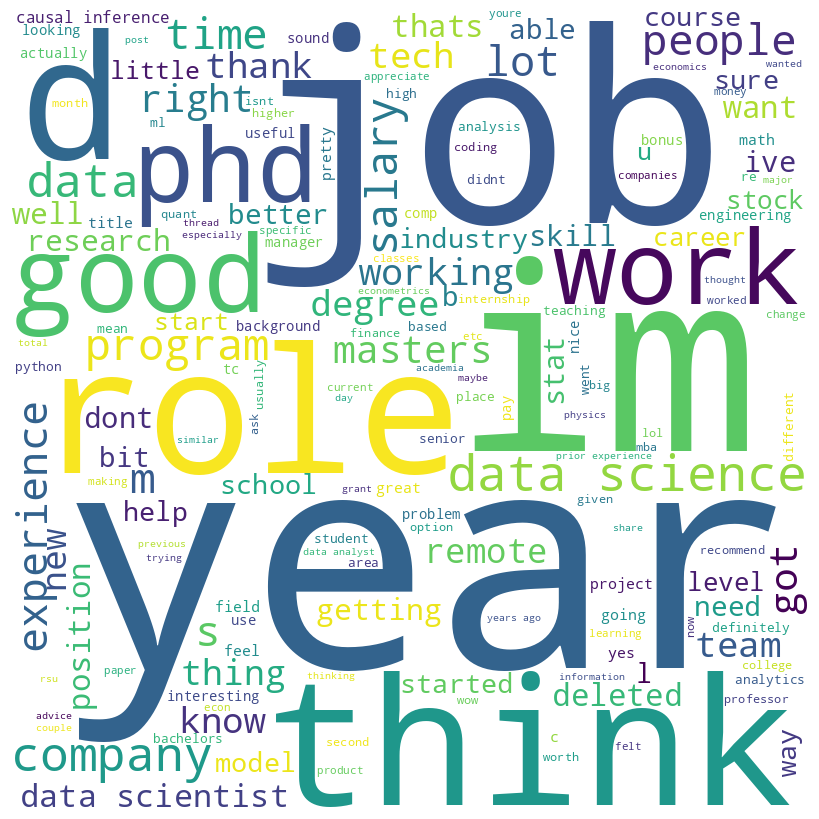

In [61]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in lst5:

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)


plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

#### Tokenize the text:

In [62]:
tokens = [t for t in comment_words.split()]
from nltk.corpus import stopwords
nltk.download('stopwords')
sr = stopwords.words('english')
clean_tokens = tokens[:]

for token in tokens:
    if token in stopwords.words('english'):
        clean_tokens.remove(token)

freq = nltk.FreqDist(clean_tokens)

for key,val in freq.items():
    print(str(key) + ':' + str(val))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[deleted]:19
salary:20
ranges:1
tc:7
packages:1
board.:2
data:91
scientist:8
year:25
tenure:7
k:43
remote,:3
us:5
small:6
tech:16
company:22
masters:18
science:35
years:46
prior:8
experience:21
scientist.:2
signing:2
bonus:3
date:2
total:15
comp:13
gonna:3
add:4
"non:1
us":1
data::1
length::3
location::3
india:1
salary::4
,:12
industry::2
based:8
financial:3
services:1
company.:9
education::3
bachelors:10
cs:14
exp::1
months:6
research:15
exp:1
lab,:1
internship:6
consulting:3
company,:4
time:22
current:8
bonus::4
stock::2
nope:1
comp::3
colleagues:2
mean:6
cost:5
cutting.:2
pre:1
taxes:1
btw.:1
mle:1
():2
.:19
yrs:4
remote:14
usa:2
hr:2
bs:12
math:7
military:3
(grunt,:1
math):1
x:1
intern:1
(not:1
ds):1
contract:1
ds:23
health:2
techdefense:1
start:10
stocks:3
sign:2
purchase:1
program:16
bonuses:3
target:4
normally:1
lower:4
hello:2
op,:2
thank:11
initiative!:1
helping:2
alot:1
people:29
ways!!:1
tenure::1
sfnyc:1
social:1
media:1
engineering:12
experience::4
kyear:2
depressing:2
any

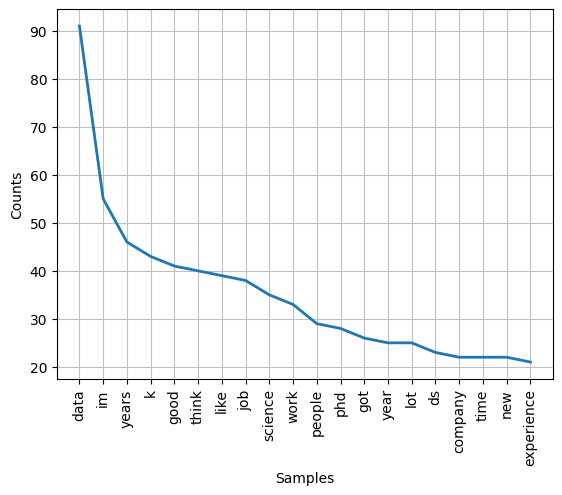

<Axes: xlabel='Samples', ylabel='Counts'>

In [63]:
freq.plot(20, cumulative=False)

### Sentiment Visualization:

In [64]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
sia = SIA()
results = []
for i in lst5:
  pol_score = sia.polarity_scores(i)
  pol_score['title'] = i
  results.append(pol_score)

In [65]:
results

[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'title': '[deleted]'},
 {'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0,
  'compound': 0.0,
  'title': 'these salary ranges tc packages board.'},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'title': '[deleted]'},
 {'neg': 0.132,
  'neu': 0.659,
  'pos': 0.21,
  'compound': 0.5574,
  'title': 'data scientist  year tenure k salary remote, us small tech company masters data science  years prior experience data scientist. no signing bonus no bonus date total comp k'},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'title': '[deleted]'},
 {'neg': 0.026,
  'neu': 0.912,
  'pos': 0.061,
  'compound': 0.4588,
  'title': 'gonna add "non  us" data: tenure length:  years location: india salary: , industry: us based financial services company. education: bachelors cs prior exp:  months research exp lab,  months internship consulting company,  months time consulting company. then  years data scientist current company. bonus:  stock: 

In [66]:
import pandas as pd
df = pd.DataFrame.from_records(results)
df.head()

,neg,neu,pos,compound,title
0,0.000,1.000,0.00,0.0000,[deleted]
1,0.000,1.000,0.00,0.0000,these salary ranges tc packages board.
2,0.000,1.000,0.00,0.0000,[deleted]
3,0.132,0.659,0.21,0.5574,"data scientist year tenure k salary remote, u..."
4,0.000,1.000,0.00,0.0000,[deleted]


In [67]:
df = df[df['title'] != '[deleted]']
df

,neg,neu,pos,compound,title
1,0.000,1.000,0.000,0.0000,these salary ranges tc packages board.
3,0.132,0.659,0.210,0.5574,"data scientist year tenure k salary remote, u..."
5,0.026,0.912,0.061,0.4588,"gonna add ""non us"" data: tenure length: year..."
7,0.063,0.833,0.103,0.3400,mle () . yrs remote usa k hr tech bs math yea...
9,0.000,0.557,0.443,0.6784,"hello op, thank initiative! this helping alot ..."
...,...,...,...,...,...
329,0.037,0.811,0.151,0.8960,the vague answer is: need order effective. but...
330,0.000,0.708,0.292,0.8860,sure. mba mindset. many pms trained mindset to...
331,0.116,0.773,0.112,-0.2732,"minimal stability years postphd, getting choo..."
332,0.000,0.000,1.000,0.3612,thank


In [68]:
# Initialize label column
df['label'] = "neutral"

# Assign sentiment labels based on compound score
df.loc[df['compound'] > 0.2, 'label'] = "positive"
df.loc[df['compound'] < -0.2, 'label'] = "negative"

<ipython-input-68-5a2852b821c6>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [69]:
fig = px.histogram(df, x="compound", color = "label", color_discrete_map={
                       "positive": "green",
                       "neutral": "blue",
                       "negative": "red"})
fig.show()

### Huggingface Transformers for Sentiment Analysis:

In [71]:
from transformers import pipeline
import torch

# Load the sentiment-analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

results = []
for text in lst5:
    # Truncate the input sequence to the maximum length supported by the model
    input_ids = sentiment_pipeline.tokenizer.encode(text, truncation=True,
                                                    max_length=sentiment_pipeline.model.config.max_position_embeddings)

    # Create a PyTorch tensor from the input IDs
    input_tensor = torch.tensor([input_ids])

    # Pass the input tensor through the model
    output = sentiment_pipeline.model(input_tensor)[0]

    # Get the sentiment label and score
    label = sentiment_pipeline.model.config.id2label[output.argmax().item()]
    score = output[0][output.argmax().item()].item()

    # Append the result to the list
    results.append({
        'text': text,
        'label': label,
        'score': score
    })

# Display the results
for text, result in zip(lst5, results):
    print(f"Text: {text} | Sentiment: {result['labe l']} | Score: {result['score']:.2f}")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


Text: [deleted] | Sentiment: NEGATIVE | Score: 4.00
Text: these salary ranges tc packages board. | Sentiment: NEGATIVE | Score: 1.41
Text: [deleted] | Sentiment: NEGATIVE | Score: 4.00
Text: data scientist  year tenure k salary remote, us small tech company masters data science  years prior experience data scientist. no signing bonus no bonus date total comp k | Sentiment: NEGATIVE | Score: 2.89
Text: [deleted] | Sentiment: NEGATIVE | Score: 4.00
Text: gonna add "non  us" data: tenure length:  years location: india salary: , industry: us based financial services company. education: bachelors cs prior exp:  months research exp lab,  months internship consulting company,  months time consulting company. then  years data scientist current company. bonus:  stock: nope total comp: , now i colleagues mean cost cutting. all pre taxes btw. | Sentiment: NEGATIVE | Score: 2.60
Text: [deleted] | Sentiment: NEGATIVE | Score: 4.00
Text: mle () . yrs remote usa k hr tech bs math  year military (grun

In [72]:
results

[{'text': '[deleted]', 'label': 'NEGATIVE', 'score': 3.998702049255371},
 {'text': 'these salary ranges tc packages board.',
  'label': 'NEGATIVE',
  'score': 1.4140398502349854},
 {'text': '[deleted]', 'label': 'NEGATIVE', 'score': 3.998702049255371},
 {'text': 'data scientist  year tenure k salary remote, us small tech company masters data science  years prior experience data scientist. no signing bonus no bonus date total comp k',
  'label': 'NEGATIVE',
  'score': 2.8930270671844482},
 {'text': '[deleted]', 'label': 'NEGATIVE', 'score': 3.998702049255371},
 {'text': 'gonna add "non  us" data: tenure length:  years location: india salary: , industry: us based financial services company. education: bachelors cs prior exp:  months research exp lab,  months internship consulting company,  months time consulting company. then  years data scientist current company. bonus:  stock: nope total comp: , now i colleagues mean cost cutting. all pre taxes btw.',
  'label': 'NEGATIVE',
  'score': 

In [76]:
len(results)

334

In [75]:
import plotly.graph_objects as go

# Assuming 'results' is a list of dictionaries with 'label' and 'score' keys
labels = ["POSITIVE", "NEGATIVE"]
positive_scores = [result["score"] for result in results if result["label"] == "POSITIVE"]
negative_scores = [result["score"] for result in results if result["label"] == "NEGATIVE"]

fig = go.Figure()
fig.add_trace(go.Bar(x=labels, y=[len(positive_scores), len(negative_scores)], marker_color=['green', 'red']))
fig.update_layout(bargap=0.4)
fig.show()